In [2]:
import pandas as pd

total_data = pd.read_csv("../data/test_scores.csv")

total_data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [3]:
total_data.shape


(2133, 11)

In [4]:
total_data.drop(['school', 'classroom', 'student_id'], axis=1, inplace=True)

In [5]:
total_data.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [6]:
total_data["lunch"].unique()

array(['Does not qualify', 'Qualifies for reduced/free lunch'],
      dtype=object)

In [7]:
total_data["school_setting"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
total_data["school_type"].unique()

array(['Non-public', 'Public'], dtype=object)

In [9]:
total_data["teaching_method"].unique()

array(['Standard', 'Experimental'], dtype=object)

In [10]:
categorical_features = ["school_setting", "school_type", "teaching_method", "gender", "lunch"]

numerical_features = ['n_student']

In [11]:
total_data.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [12]:
total_data['score_difference'] = total_data['posttest'] - total_data['pretest']

In [13]:
total_data.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest,score_difference
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0,10.0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0,13.0
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,12.0
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0,16.0
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,12.0


In [14]:
min_value = total_data['score_difference'].min()
max_value = total_data['score_difference'].max()

print(f"The range of score_difference column is from {min_value} to {max_value}")

The range of score_difference column is from -2.0 to 28.0


In [15]:
total_data.isnull().sum()

school_setting      0
school_type         0
teaching_method     0
n_student           0
gender              0
lunch               0
pretest             0
posttest            0
score_difference    0
dtype: int64

In [16]:
duplicate_rows = total_data.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 108


In [17]:
total_data.drop_duplicates(inplace=True)

In [18]:
total_data.shape

(2025, 9)

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [35]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [36]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [37]:
# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data into features and target
X = total_data.drop(columns=['posttest', 'pretest','score_difference'])
y = total_data['score_difference']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.282032901897207


In [39]:
X

,school_setting,school_type,teaching_method,n_student,gender,lunch
0,Urban,Non-public,Standard,20.0,Female,Does not qualify
1,Urban,Non-public,Standard,20.0,Female,Does not qualify
2,Urban,Non-public,Standard,20.0,Male,Does not qualify
3,Urban,Non-public,Standard,20.0,Female,Does not qualify
5,Urban,Non-public,Standard,20.0,Female,Does not qualify
...,...,...,...,...,...,...
2125,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch
2126,Urban,Public,Standard,30.0,Male,Qualifies for reduced/free lunch
2127,Urban,Public,Standard,30.0,Male,Qualifies for reduced/free lunch
2129,Urban,Public,Standard,30.0,Female,Qualifies for reduced/free lunch


In [40]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['n_student']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['school_setting',
                                                   'school_type',
                                                   'teaching_method', 'gender',
                                                   'lunch'])])),
                ('regressor', LinearRegression())])

In [41]:
y_pred = pipeline.predict(X_test)

In [42]:
mean_squared_error(y_test, y_pred)

10.771739969135803

In [43]:
from sklearn.metrics import r2_score

print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.4801387813814302


In [44]:
import pickle

# Save the entire pipeline to a file
with open('test_scores.sav', 'wb') as file:
    pickle.dump(pipeline, file)

In [45]:
from joblib import dump, load

# Save the trained model
dump(pipeline, 'trained_model.joblib')

# Load the saved model
loaded_model = load('trained_model.joblib')

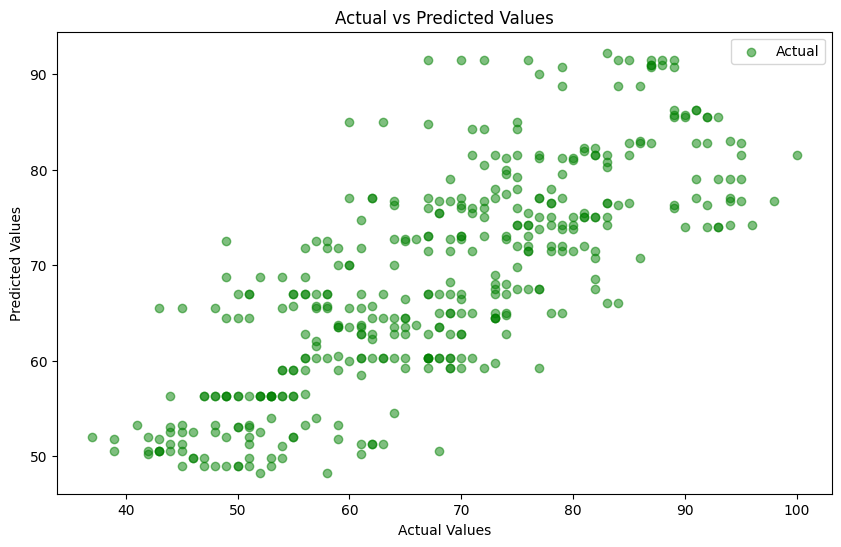

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot actual values in green
plt.scatter(y_test, y_pred, c='green', alpha=0.5, label='Actual')



plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

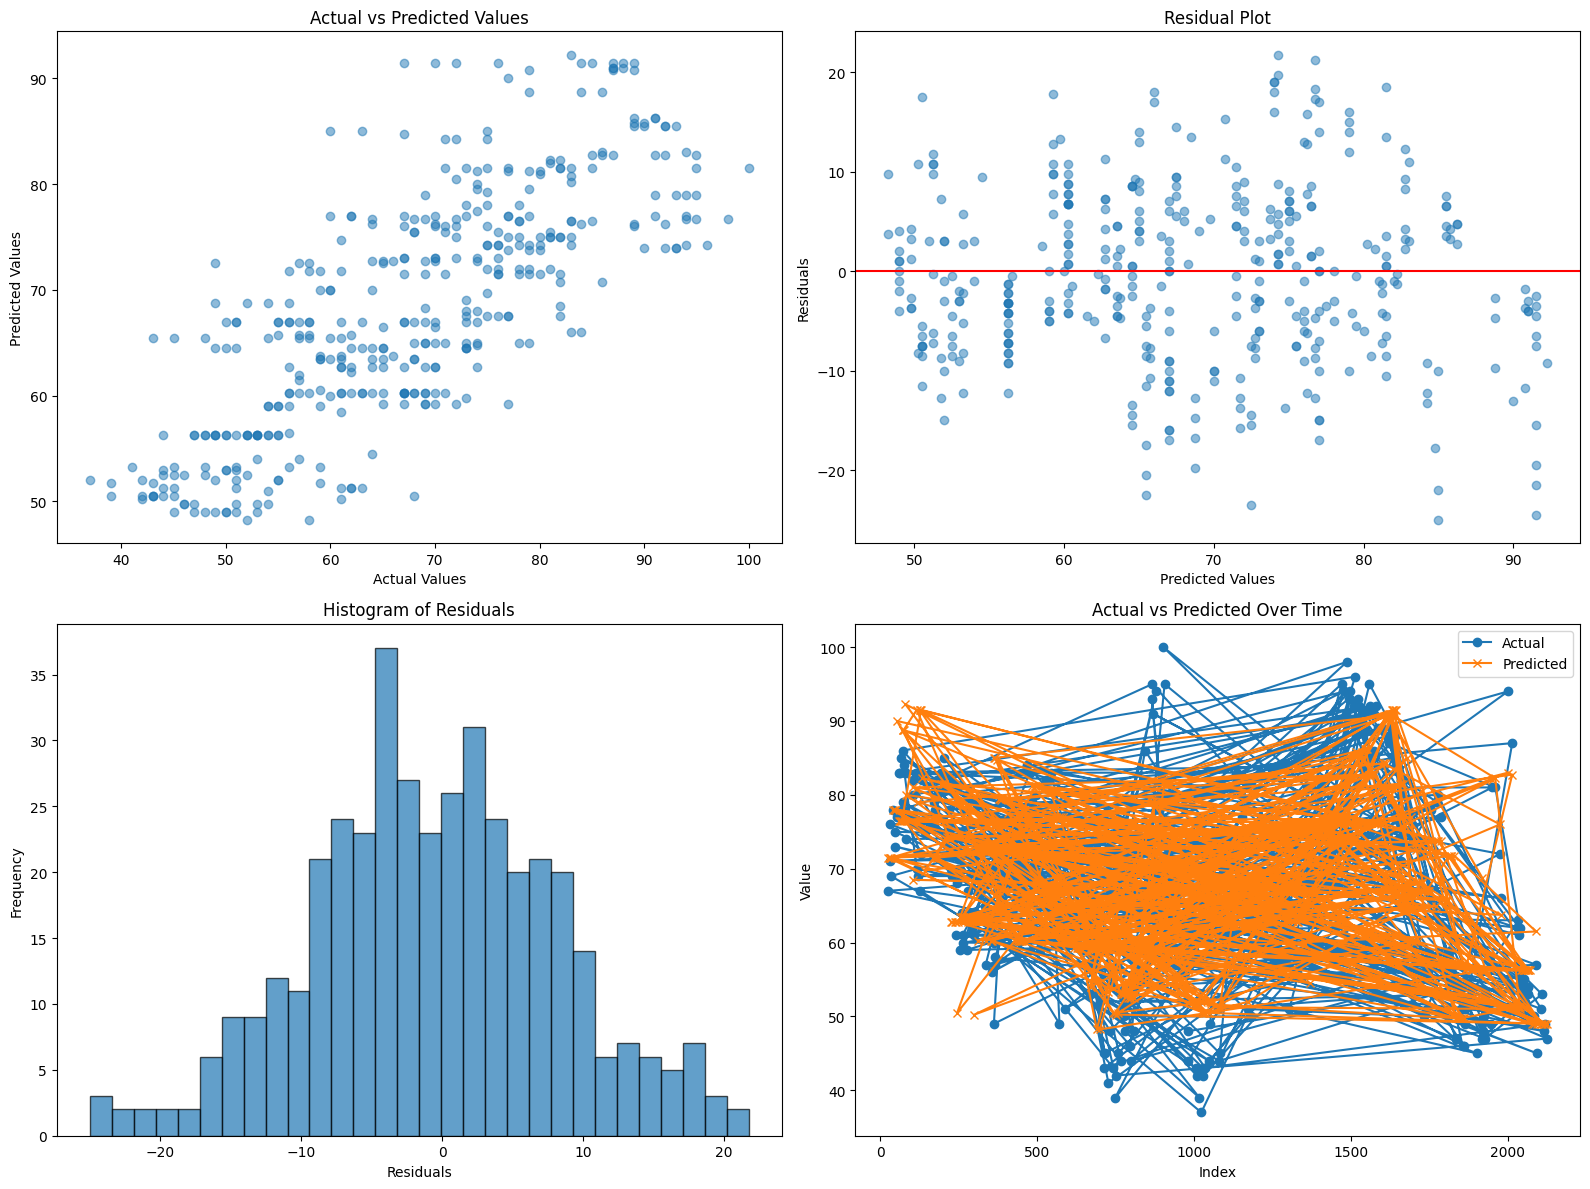

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
residuals = y_test - y_pred

# Scatter Plot
axes[0, 0].scatter(y_test, y_pred, alpha=0.5)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Actual vs Predicted Values')

# Residual Plot
axes[0, 1].scatter(y_pred, residuals, alpha=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='-')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# Histogram of Residuals
axes[1, 0].hist(residuals, bins=30, edgecolor='k', alpha=0.7)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Residuals')

# Actual vs Predicted Over Time
axes[1, 1].plot(y_test.index, y_test, label='Actual', marker='o')
axes[1, 1].plot(y_test.index, y_pred, label='Predicted', marker='x')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Value')
axes[1, 1].set_title('Actual vs Predicted Over Time')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [33]:
from joblib import load

# Load the model
pipeline = load('trained_model.joblib')

# Print the type and some information about the loaded object
print(type(pipeline))
print(pipeline)

<class 'sklearn.pipeline.Pipeline'>
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['n_student']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['school_setting',
                                                   'school_type',
                                                   'teaching_method', 'gender',
                                                   'lunch'])])),
                ('regressor', LinearRegression())])


In [34]:
from joblib import load

# Load the model
pipeline = load('trained_model.joblib')

# Check if the loaded object has the 'predict' method
if hasattr(pipeline, 'predict'):
    print("Model has 'predict' method.")
else:
    print("Model does not have 'predict' method.")

Model has 'predict' method.
